# Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/NLP-Project/data/train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Note: There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

## Exploration

In [5]:
#check number which are duplicates
df["is_duplicate"].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
#drop rows with blank values (there are only a very small number)
df.dropna(inplace=True)

In [8]:
df.shape

(404287, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [10]:
df["is_duplicate"].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

## Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Lemmatization

In [11]:
#import required packages for cleaning
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.stem import PorterStemmer

import string
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
ENGstopwords = stopwords.words('english')

#### Create cleaning function

In [13]:
#define cleaning function

def clean(text):
    
    # remove punctuation    
    text = "".join([char for char in text if char not in string.punctuation])

    # tokenize words
    tokens = text.split()

    # remove all stopwords
    tokens_no_stopwords = [word for word in tokens if word not in ENGstopwords]

    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens_n = [lemmatizer.lemmatize(token) for token in tokens_no_stopwords]
    lemmatized_tokens_v = [lemmatizer.lemmatize(token, pos ="v") for token in lemmatized_tokens_n]
    lemmatized_tokens_a = [lemmatizer.lemmatize(token, pos ="a") for token in lemmatized_tokens_v]
    lemmatized_tokens_r = [lemmatizer.lemmatize(token, pos ="r") for token in lemmatized_tokens_a]
    lemmatized_tokens_s = [lemmatizer.lemmatize(token, pos ="s") for token in lemmatized_tokens_r]
        
    return lemmatized_tokens_s


df['q1_clean'] = df['question1'].apply(lambda x: clean(x.lower()))
df['q2_clean'] = df['question2'].apply(lambda x: clean(x.lower()))

In [14]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, steal, koh..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increase, speed, internet, connection, use, vpn]","[internet, speed, increase, hack, dns]"
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mentally, lonely, solve]","[find, remainder, math2324math, divide, 2423]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]"


In [15]:
# type(df.iloc[0,7])

## Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

### Feature 1: tf-idf Cosine Similarity Feature

In [16]:
# create a string from the pre-processed text tokens

q1_strings = []
q2_strings = []
i = 0

while i < df.shape[0]:
    q1_strings.append(' '.join(df.iloc[i,6]))
    q2_strings.append(' '.join(df.iloc[i,7]))
    i += 1

df['q1_strings'] = q1_strings
df['q2_strings'] = q2_strings

In [17]:
#create corpus
 
corpus = pd.concat([df['q1_strings'], df['q2_strings']])
corpus.head()

0            step step guide invest share market india
1                      story kohinoor kohinoor diamond
2           increase speed internet connection use vpn
3                                mentally lonely solve
4    one dissolve water quikly sugar salt methane c...
dtype: object

In [18]:
#define cleaning function

def clean(text):
    
    # remove punctuation    
    text = "".join([char for char in text if char not in string.punctuation])

    # tokenize words
    tokens = text.split()

    # remove all stopwords
    tokens_no_stopwords = [word for word in tokens if word not in ENGstopwords]

    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens_n = [lemmatizer.lemmatize(token) for token in tokens_no_stopwords]
    lemmatized_tokens_v = [lemmatizer.lemmatize(token, pos ="v") for token in lemmatized_tokens_n]
    lemmatized_tokens_a = [lemmatizer.lemmatize(token, pos ="a") for token in lemmatized_tokens_v]
    lemmatized_tokens_r = [lemmatizer.lemmatize(token, pos ="r") for token in lemmatized_tokens_a]
    lemmatized_tokens_s = [lemmatizer.lemmatize(token, pos ="s") for token in lemmatized_tokens_r]
        
    return lemmatized_tokens_s


df['q1_clean'] = df['question1'].apply(lambda x: clean(x.lower()))
df['q2_clean'] = df['question2'].apply(lambda x: clean(x.lower()))

In [19]:
#Instantiate TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(corpus)

TfidfVectorizer()

In [20]:
#transform strings to vector

q1_vecs = vectorizer.transform(df['q1_strings'])
q2_vecs = vectorizer.transform(df['q2_strings'])

In [278]:
q1_vecs[0]

<1x94166 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [21]:
#create a list of cosine similarities

cosine_similarity_list = []

from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(df)):
       
        cosine_similarity_list.append(cosine_similarity(q1_vecs[i], q2_vecs[i]))

In [22]:
i = 0
cosine_similarity = []

while i < df.shape[0]:
    cosine_similarity.append(cosine_similarity_list[i][0][0])
    i += 1

In [23]:
df['cosine_similarity'] = cosine_similarity

In [24]:
df.to_csv("processed_questions_w_feat1.csv", index = False)

### Feature 2: Number of Same Words in Both Questions

In [25]:
# sq_set_1 = []
# sq_set_2 = []
# i = 0

# while i < df.shape[0]:
#     sq_set_1.append(set(df.iloc[i,6]))
#     sq_set_2.append(set(df.iloc[i,7]))
#     i += 1

In [26]:
# df['sq_set_1'] = sq_set_1
# df['sq_set_2'] = sq_set_2

In [27]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean,q1_strings,q2_strings,cosine_similarity
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",step step guide invest share market india,step step guide invest share market,0.978631
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, steal, koh...",story kohinoor kohinoor diamond,would happen indian government steal kohinoor ...,0.822231


In [28]:
common_len = []
i = 0

while i < df.shape[0]:
    common_len.append(len((set(df.iloc[i,6]).intersection(set(df.iloc[i,7])))))
    i += 1

In [29]:
df['common_len'] = common_len

In [30]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean,q1_strings,q2_strings,cosine_similarity,common_len
83750,83750,71619,314,Can I upload part of anime videos on YouTube a...,How do you upload movies on YouTube and moneti...,1,"[upload, part, anime, video, youtube, monetize...","[upload, movie, youtube, monetize, issue, copy...",upload part anime video youtube monetize witho...,upload movie youtube monetize issue copyright,0.775899,5
184792,184792,282233,282234,What of are some good reasons to why you shoul...,How stupid is the American mainstream media?,0,"[good, reason, shouldnt, trust, mainstream, me...","[stupid, american, mainstream, medium]",good reason shouldnt trust mainstream medium,stupid american mainstream medium,0.498374,2
24879,24879,46425,36801,What is the surgical strike?,What do you mean by surgical strike?,1,"[surgical, strike]","[mean, surgical, strike]",surgical strike,mean surgical strike,0.910564,2
234196,234196,344638,85979,How can I be happy living with people who judg...,How can I be happy living with people who judg...,1,"[happy, live, people, judge, action, wrong]","[happy, live, people, judge, action, wrong]",happy live people judge action wrong,happy live people judge action wrong,1.000000,6
272050,272050,1098,390254,What are some Interesting mobile apps?,What are the best mobile apps to have?,0,"[interest, mobile, apps]","[best, mobile, apps]",interest mobile apps,best mobile apps,0.788308,2
79029,79029,134649,134650,Is what people share more important than what ...,Why does boost YouTube views?,0,"[people, share, important, divide]","[boost, youtube, view]",people share important divide,boost youtube view,0.000000,0
78224,78224,133420,133421,Something thing you've seen?,What is the strangest thing you've ever seen?,0,"[something, thing, youve, see]","[strange, thing, youve, ever, see]",something thing youve see,strange thing youve ever see,0.607901,3
24481,24481,45730,45731,What are some good Korean horror films out rig...,What are some of the best Korean horror movies?,1,"[good, korean, horror, film, right]","[best, korean, horror, movie]",good korean horror film right,best korean horror movie,0.653902,2
80150,80150,35737,107663,How can I add my profile picture on Qoura?,How do I change profile picture in Quora?,1,"[add, profile, picture, qoura]","[change, profile, picture, quora]",add profile picture qoura,change profile picture quora,0.486711,2
23396,23396,43821,43822,"If you could live in a movie, what movie would...","If you could live in a movie, which movie woul...",1,"[could, live, movie, movie, would]","[could, live, movie, movie, would, choose]",could live movie movie would,could live movie movie would choose,0.899678,4


In [31]:
df.to_csv("processed_questions_w_feat2.csv", index = False)

### Feature 3: Word Count

In [32]:
# need to count words INCLUDING stopwords! 
# create cleaning function which creates a list of words including stopwords and find len. 

In [33]:
#define cleaning function

def clean_keep_stopwords(text):
    
    # remove punctuation    
    text = "".join([char for char in text if char not in string.punctuation])

    # tokenize words
    tokens = text.split()

#     # remove all stopwords
#     tokens_no_stopwords = [word for word in tokens if word not in ENGstopwords]

#     # lemmatize
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_tokens_n = [lemmatizer.lemmatize(token) for token in tokens_no_stopwords]
#     lemmatized_tokens_v = [lemmatizer.lemmatize(token, pos ="v") for token in lemmatized_tokens_n]
#     lemmatized_tokens_a = [lemmatizer.lemmatize(token, pos ="a") for token in lemmatized_tokens_v]
#     lemmatized_tokens_r = [lemmatizer.lemmatize(token, pos ="r") for token in lemmatized_tokens_a]
#     lemmatized_tokens_s = [lemmatizer.lemmatize(token, pos ="s") for token in lemmatized_tokens_r]
        
    return len(tokens)


df['q1_raw_tokens'] = df['question1'].apply(lambda x: clean_keep_stopwords(x.lower()))
df['q2_raw_tokens'] = df['question2'].apply(lambda x: clean_keep_stopwords(x.lower()))

In [34]:
df['difference_word_count'] = df['q1_raw_tokens']/df['q2_raw_tokens']

In [35]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean,q1_strings,q2_strings,cosine_similarity,common_len,q1_raw_tokens,q2_raw_tokens,difference_word_count
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",step step guide invest share market india,step step guide invest share market,0.978631,5,14,12,1.166667
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, steal, koh...",story kohinoor kohinoor diamond,would happen indian government steal kohinoor ...,0.822231,2,8,13,0.615385
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increase, speed, internet, connection, use, vpn]","[internet, speed, increase, hack, dns]",increase speed internet connection use vpn,internet speed increase hack dns,0.441928,3,14,10,1.400000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mentally, lonely, solve]","[find, remainder, math2324math, divide, 2423]",mentally lonely solve,find remainder math2324math divide 2423,0.000000,0,11,9,1.222222
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]",one dissolve water quikly sugar salt methane c...,fish would survive salt water,0.232004,2,13,7,1.857143


In [36]:
df.to_csv("processed_questions_w_feat3.csv", index = False)

In [37]:
# df = pd.read_csv("processed_questions_w_feat3.csv")

### Feature 4: Word2Vec

In [78]:
# create a string from the pre-processed text tokens

q1_unique_tokens = []
q2_unique_tokens = []

i = 0

while i < df.shape[0]:
    q1_unique_tokens.append(list(set(df.iloc[i,6])))
    q2_unique_tokens.append(list(set(df.iloc[i,7])))
    i += 1

# print(len(q1_unique_tokens))
# print(len(q2_unique_tokens))
df['q1_unique_tokens'] = q1_unique_tokens
df['q2_unique_tokens'] = q2_unique_tokens
# print(q1_unique_tokens)

In [145]:
import gensim

# Create CBoW model
#size: output vector size
#window: size of window for surrounding words
#min_count: ignores all words that appear less than min_count times
corpus_unique = pd.concat([df['q1_unique_tokens'], df['q2_unique_tokens']])
Model_CBoW = gensim.models.Word2Vec(corpus_unique, vector_size=100, window = 3, min_count = 1)

In [334]:
df = df[df['q1_raw_tokens'] != 0]
df = df[df['q2_raw_tokens'] != 0]
df.shape[0]

404167

In [335]:
#create q1_w2v
x = 0
q1_w2v = []

while x < df.shape[0]:
    tokens = df.iloc[x,15]
    if(len(tokens) != 0):
        q1_w2v.append(Model_CBoW.wv[tokens[0]])
    else:
        q1_w2v.append(0)
    
    z = 1
    
    while z < len(tokens):
        q1_w2v[x] = q1_w2v[x] + Model_CBoW.wv[tokens[z]]
        
        z += 1
    
    x += 1

In [337]:
len(q1_w2v)

404167

In [338]:
#create q2_w2v
x = 0
q2_w2v = []

while x < df.shape[0]:
    tokens = df.iloc[x,16]
    if(len(tokens) != 0):
        q2_w2v.append(Model_CBoW.wv[tokens[0]])
    else:
        q2_w2v.append(0)
    
    z = 1
    
    while z < len(tokens):
        q2_w2v[x] = q2_w2v[x] + Model_CBoW.wv[tokens[z]]
        
        z += 1
    
    x += 1

In [340]:
len(q2_w2v)

404167

In [341]:
df['q1_w2v'] = q1_w2v
df['q2_w2v'] = q2_w2v

In [342]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean,q1_strings,q2_strings,cosine_similarity,common_len,q1_raw_tokens,q2_raw_tokens,difference_word_count,q1_unique_tokens,q2_unique_tokens,q1_w2v,q2_w2v
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",step step guide invest share market india,step step guide invest share market,0.978631,5,14,12,1.166667,"[guide, invest, india, market, share, step]","[guide, invest, market, share, step]","[0.884529, 0.7615855, 2.9755511, -6.5535207, 3...","[0.10782987, -0.22691166, 2.9367242, -5.850479..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, steal, koh...",story kohinoor kohinoor diamond,would happen indian government steal kohinoor ...,0.822231,2,8,13,0.615385,"[story, diamond, kohinoor]","[happen, steal, government, indian, back, diam...","[-0.91223454, 0.48340303, -0.1147946, 0.684025...","[-0.15433541, -3.4760442, 1.7253506, -2.373243..."


In [343]:
i = 0
type_q1_w2v = []
type_q2_w2v = []

while i < df.shape[0]:
    if type(df.iloc[i,17]) == np.ndarray:
        type_q1_w2v.append('array')
    else:
        type_q1_w2v.append('int')
        
    if type(df.iloc[i,18]) == np.ndarray:
        type_q2_w2v.append('array')
    else:
        type_q2_w2v.append('int')
        
    i += 1
    
df['type_q1_w2v'] = type_q1_w2v
df['type_q2_w2v'] = type_q2_w2v




In [348]:
df = df[df['type_q1_w2v'] != 'int']
df = df[df['type_q2_w2v'] != 'int']

In [349]:
df.shape[0]

404167

In [352]:
# df = df.drop(['type_q1_w2v', 'type_q2_w2v'], axis=1)

In [353]:
import numpy as np

In [354]:
arr_q1_w2v = np.array(q1_w2v)
arr_q2_w2v = np.array(q2_w2v)

In [359]:
type(arr_q1_w2v[0])

numpy.ndarray

In [292]:
type(arr_q1_w2v[0])

numpy.ndarray

In [364]:
#create a list of cosine similarities

cos_sim_w2v = []

for i in range(df.shape[0]):
       
        cos_sim_w2v.append(np.dot(q1_w2v[i], q2_w2v[i]) / (np.sqrt(np.dot(q1_w2v[i], q1_w2v[i])) * np.sqrt(np.dot(q2_w2v[i], q2_w2v[i]))))

In [366]:
print(len(cos_sim_w2v))
print(min(cos_sim_w2v))
print(max(cos_sim_w2v))

404167
-0.2962244
1.0000002


In [367]:
df['cos_sim_w2v'] = cos_sim_w2v

In [369]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean,q1_strings,q2_strings,cosine_similarity,common_len,q1_raw_tokens,q2_raw_tokens,difference_word_count,q1_unique_tokens,q2_unique_tokens,q1_w2v,q2_w2v,cos_sim_w2v
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",step step guide invest share market india,step step guide invest share market,0.978631,5,14,12,1.166667,"[guide, invest, india, market, share, step]","[guide, invest, market, share, step]","[0.884529, 0.7615855, 2.9755511, -6.5535207, 3...","[0.10782987, -0.22691166, 2.9367242, -5.850479...",0.955502
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, kohinoor, diamond]","[would, happen, indian, government, steal, koh...",story kohinoor kohinoor diamond,would happen indian government steal kohinoor ...,0.822231,2,8,13,0.615385,"[story, diamond, kohinoor]","[happen, steal, government, indian, back, diam...","[-0.91223454, 0.48340303, -0.1147946, 0.684025...","[-0.15433541, -3.4760442, 1.7253506, -2.373243...",0.374187


## Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

### Final Data Preparation for Modelling

In [370]:
#prepare df for modelling
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_clean', 'q2_clean', 'q1_strings', 'q2_strings', 'cosine_similarity',
       'common_len', 'q1_raw_tokens', 'q2_raw_tokens', 'difference_word_count',
       'q1_unique_tokens', 'q2_unique_tokens', 'q1_w2v', 'q2_w2v',
       'cos_sim_w2v'],
      dtype='object')

In [371]:
df.columns = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_clean', 'q2_clean', 'q1_strings', 'q2_strings', 'tfidf_cosine_similarity',
       'common_len', 'q1_raw_tokens', 'q2_raw_tokens', 'difference_word_count',
       'q1_unique_tokens', 'q2_unique_tokens', 'q1_w2v', 'q2_w2v',
       'w2v_cos_sim']

In [372]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_clean', 'q2_clean', 'q1_strings', 'q2_strings',
       'tfidf_cosine_similarity', 'common_len', 'q1_raw_tokens',
       'q2_raw_tokens', 'difference_word_count', 'q1_unique_tokens',
       'q2_unique_tokens', 'q1_w2v', 'q2_w2v', 'w2v_cos_sim'],
      dtype='object')

In [375]:
#select columns to keep
#reorder so 'is_duplicate' is last
df_model = df[['tfidf_cosine_similarity', 'common_len', 'difference_word_count', 'w2v_cos_sim', 'is_duplicate']]
df_model.head()

,tfidf_cosine_similarity,common_len,difference_word_count,w2v_cos_sim,is_duplicate
0,0.978631,5,1.166667,0.955502,0
1,0.822231,2,0.615385,0.374187,0
2,0.441928,3,1.400000,0.905253,0
3,0.000000,0,1.222222,0.364897,0
4,0.232004,2,1.857143,0.808071,0


### XGBoost

In [374]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [376]:
X, y, = df_model.iloc[:,:-1], df_model.iloc[:,-1]

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [380]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)

In [381]:
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123, ...)

In [383]:
preds = xg_cl.predict(X_test)

In [384]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

In [385]:
print("accuracy: %f" % (accuracy))

accuracy: 0.712225


In [ ]:
from sklearn.ensemble import RandomForestClassifierrfc = RandomForestClassifier(random_state=1111)rfc.fit(X_train, y_train)rfc.predict(X_test)

### Random Forest Classifier

In [386]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [387]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [393]:
#make predictions
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [394]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.9851422527239719
Test Accuracy: 0.7146621471163125


### Confusion Matrix

In [395]:
from sklearn.metrics import confusion_matrix

In [406]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [405]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

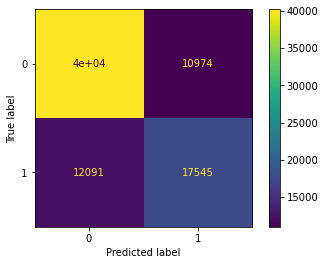

In [407]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [408]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     51198
           1       0.62      0.59      0.60     29636

    accuracy                           0.71     80834
   macro avg       0.69      0.69      0.69     80834
weighted avg       0.71      0.71      0.71     80834

